<a href="https://colab.research.google.com/github/agra98/Heart-Disease-Prediction-Logistic-Regression-Model/blob/main/heart_disease_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/My Drive/Practice/framingham.csv')

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.rename(columns={'male':'Sex_male'}, inplace=True)

# Handling Missing Values


In [7]:
data.dropna(axis=0,inplace=True)
print(data.shape)
print(data.TenYearCHD.value_counts())

(3658, 16)
TenYearCHD
0    3101
1     557
Name: count, dtype: int64


# Splitting dataset into test and train sets

In [8]:
X=np.asarray(data[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
Y=np.asarray(data['TenYearCHD'])

x=preprocessing.StandardScaler().fit(X).transform(X)

#Train-and-Test-Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)
print('Train Set:',X_train.shape,Y_train.shape)
print('Test Set:',X_test.shape,Y_test.shape)


Train Set: (2560, 6) (2560,)
Test Set: (1098, 6) (1098,)


# Exploratary Data Analysis

<ipython-input-9-e0fde32e83ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD',data=data,palette='hls')


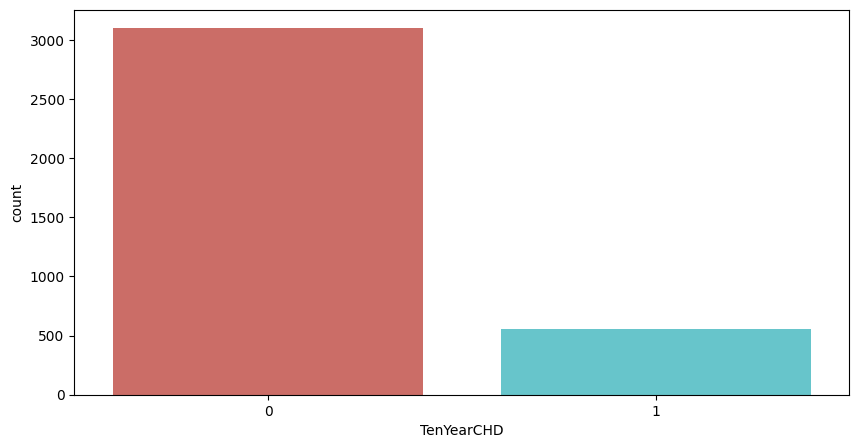

In [9]:
# counting no. of patients affected with CHD
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD',data=data,palette='hls')
plt.show()

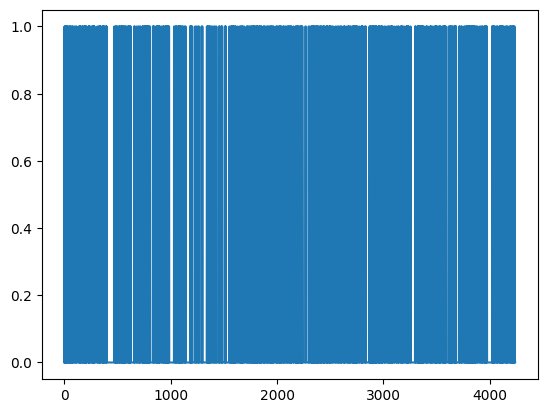

In [10]:
laste = data['TenYearCHD'].plot()
plt.show()

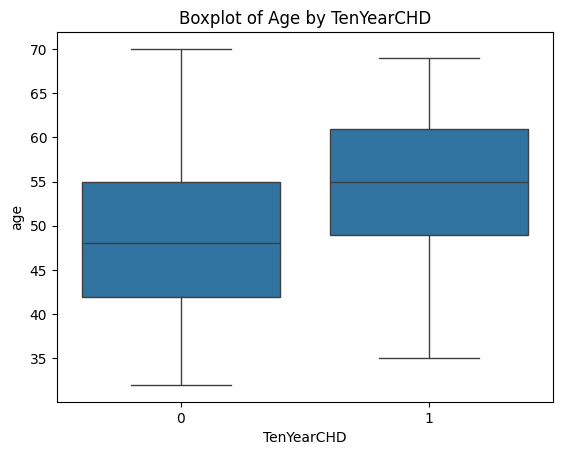

In [11]:
sns.boxplot(x='TenYearCHD', y='age', data=data)
plt.title('Boxplot of Age by TenYearCHD')
plt.show()

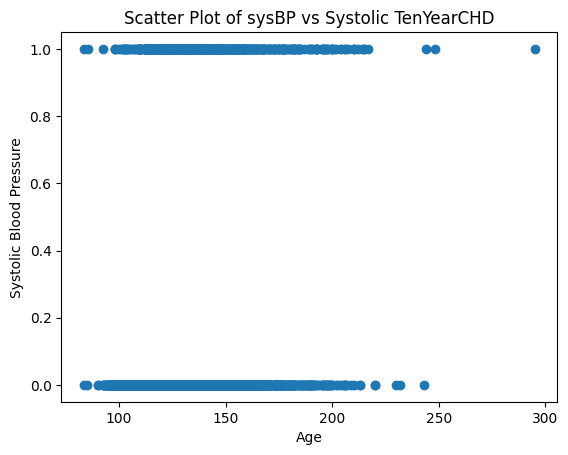

In [12]:
plt.scatter(data['sysBP'], data['TenYearCHD'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Scatter Plot of sysBP vs Systolic TenYearCHD')
plt.show()

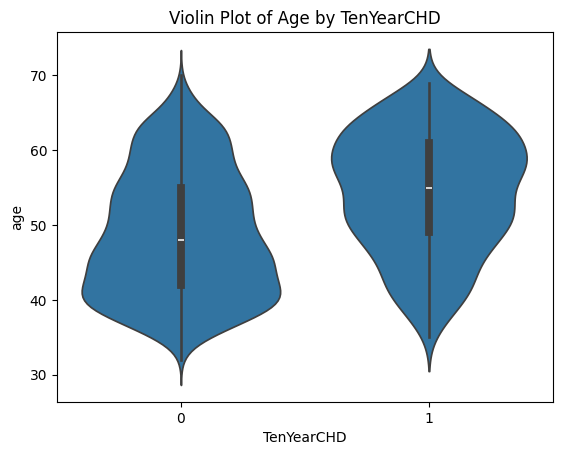

In [13]:
sns.violinplot(x='TenYearCHD', y='age', data=data)
plt.title('Violin Plot of Age by TenYearCHD')
plt.show()


#Fitting Logistic Regression Model for Heart Disease Prediction

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

Evaluating Logistic Regression Model

In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is = ',accuracy_score(Y_test,y_pred))

Accuracy of the model is =  0.843351548269581


Confusion Matrix

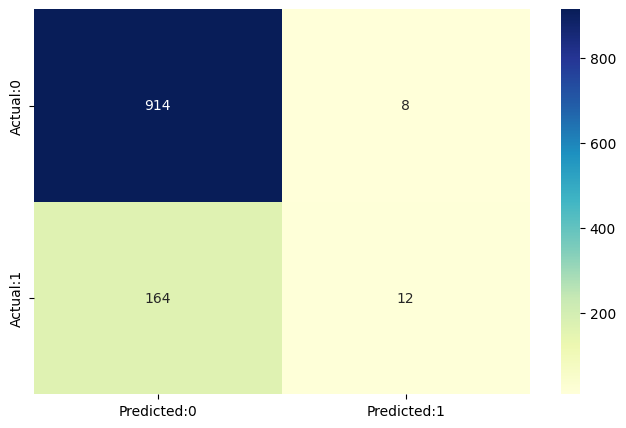

Details of confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       922
           1       0.60      0.07      0.12       176

    accuracy                           0.84      1098
   macro avg       0.72      0.53      0.52      1098
weighted avg       0.81      0.84      0.79      1098



In [16]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

print('Details of confusion matrix is =')
print(classification_report(Y_test,y_pred))

# ROC and AUC Analysis

AUC Score: 0.713832330901203


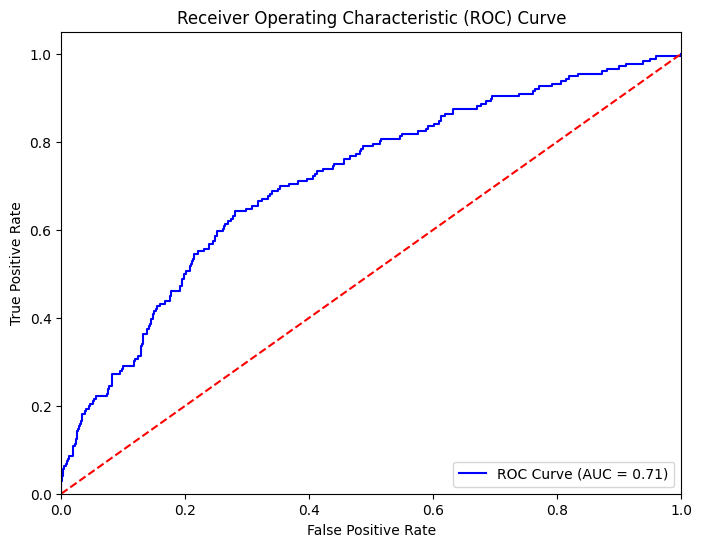

In [17]:
# Get predicted probabilities for the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_prob)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Deploying Model

Save Model

In [18]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [19]:
import joblib

# Save the model to a file
joblib.dump(logreg, 'model.joblib')


['model.joblib']

Deploying Model using Gradio

In [20]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [21]:
import gradio as gr

# Load your model
model = joblib.load('model.pkl')

# Define the prediction function
def predict(age, Sex_male, cigsPerDay, totChol, sysBP, glucose):
    # Create an input array from the given inputs
    input_features = np.array([[age, Sex_male, cigsPerDay, totChol, sysBP, glucose]])

    print("Input features shape:", input_features.shape)  # Debugging: Check input shape
    print("Input features data:", input_features)  # Debugging: Check input data

    # Perform the prediction using the model
    try:
        prediction = model.predict(input_features)
        return f"Predicted TenYearCHD: {prediction[0]}"
    except Exception as e:
        return f"Error during prediction: {str(e)}"

# Create Gradio interface with custom inputs for each column
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.components.Number(label="Age"),
        gr.components.Number(label="Male (1 for male, 0 for female)"),
        gr.components.Number(label="Cigs Per Day"),
        gr.components.Number(label="Total Cholesterol"),
        gr.components.Number(label="Systolic Blood Pressure"),
        gr.components.Number(label="Glucose"),
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter the patient's details to predict the risk of heart disease within 10 years."
)

# Launch the interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://225070539211e3b663.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [1]:
git clone https://github.com/agra98/Heart-Disease-Prediction-Logistic-Regression-Model.git
cd Heart-Disease-Prediction-Logistic-Regression-Model


SyntaxError: invalid syntax (<ipython-input-1-0214caafe42a>, line 1)